## 1. Статистика
Вы измеряете физическую величину, например, давление, следите, чтобы оно не превышало 5 атм.

Получили ряд измерений, при этом условия процесса не менялись. Давление на самом деле было постоянным.

Измерения: (5.2, 4.3, 4.7, 4.9 , 5.5) атм.

С какой вероятностью давление
* ниже 5 атм?
* ниже 4 атм?

### Оценка
* Правильный ответ - 20 баллов
* Правильный подход при неправильном ответе - 15 баллов

### Решение

In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
pressure = [5.2, 4.3, 4.7, 4.9, 5.5]

Вероятность того, что давление ниже 5 атм, можно рассчитать с помощью z-table:

In [3]:
mean = np.mean(pressure)

In [4]:
mean

4.92

In [5]:
std = np.round(np.std(pressure), 2)

In [6]:
std

0.41

z-преобразование для давления в 5 атм

In [7]:
z5 = np.round((5 - mean) / std, 2)

In [8]:
z5

0.2

Согласно z-table вероятность того, что значение окажется в интервале ниже 5 атм, равна 0.5793

z-преобразование для давления в 4 атм

In [9]:
z4 = round((4 - mean) / std, 2)

In [10]:
z4

-2.24

Согласно z-table вероятность того, что значение окажется в интервале ниже 4 атм, равна 0.0125

**Дополнительно: CDF и bootstrap**

**CDF**

Вероятности того, что давление меньше или равно 5 и 4 атм, можно рассчитать с помощью CDF, предварительно сгенерировав нормальное распределение по известным среднему значению и станадртному отклонению:

In [11]:
probability_less_or_equal_5 = round(float(stats.norm(mean, std).cdf(5)), 3)

In [12]:
probability_less_or_equal_5

0.577

In [13]:
probability_less_or_equal_4 = round(float(stats.norm(mean, std).cdf(4)), 3)

In [14]:
probability_less_or_equal_4

0.012

Вероятности, что давление меньше или равно 5 и 4 атм, рассчитанные с помощью CDF, равны 57.7% и 1.2%.

**Bootstrap**

Также мы можем смоделировать эксперимент 10000 раз с помощью bootstrap. <br> 
В этом случае станадртное отклонение уменьшится с 0.41 (для исходных пяти значений) до 0.18.

In [15]:
np.random.seed(42)

In [16]:
bootstrap = pd.DataFrame({'pressure' : [np.random.choice(pressure, 5).mean() for i in range(0,10000)]})

In [17]:
mean_bootstrap = bootstrap['pressure'].mean()

In [18]:
mean_bootstrap

4.920932

In [19]:
std_bootstrap = np.std(bootstrap['pressure'])

In [20]:
std_bootstrap

0.18430022077035063

In [21]:
z5_bootstrap = round((5 - mean_bootstrap) / std_bootstrap, 2)

In [22]:
z5_bootstrap

0.43

In [23]:
z4_bootstrap = round((4 - mean_bootstrap) / std_bootstrap, 2)

In [24]:
z4_bootstrap

-5.0

Вероятности, что давление меньше или равно 5 и 4 атм, рассчитанные после бутстрэпинга, равны 66.64% и <0.002%. <br>

### Ответ

Вероятность того, что давление ниже или равно 5 атм: 57.93% <br>
Вероятность того, что давление ниже или равно 4 атм: 1.25 %

## 2. Теория вероятностей
Два лучника стреляют в мишень. 

Когда они независимо стреляют, тренируются, то первый из них попадает в мишень с вероятностью 70%, а второй - 55%.

Теперь они выстрелили вместе. В результате в мишени торчит одна стрела.

Вопрос: какова вероятность, что попал первый лучник, а какова - что второй?

### Оценка
* Правильный ответ - 30 баллов
* Правильный подход при неправильном ответе - 15 баллов

### Решение

Так как нам известен исход (в мишень попала одна стрела), мы можем использовать байесовский подход.

Гипотезы:
1. В мишень попал первый лучник, второй промахнулся - H1
2. В мишень попал второй лучник, первый промахнулся - H2
3. В мишень попали оба лучника - H3
4. В мишень не попал ни один лучник - H4

Если два события происходят одноврменно, выроятности перемножаются. 

Вероятности гипотез:
1. В мишень попал первый лучник, второй промахнулся: P(H1) = 0.7 * (1-0.55) = 0.315
2. В мишень попал второй лучник, первый промахнулся: P(H2) = 0.55 * (1-0.7) = 0.165
3. В мишень попали оба лучника: P(H3) = 0.7 * 0.55 = 0.385
4. В мишень не попал ни один лучник: P(H4) = (1-0.7) * (1-0.55) = 0.135

Сумма вероятностей: 
0.315 + 0.165 + 0.385 + 0.135 = 1

Вероятность исхода с учетом выдвинутых гипотез:
1. В мишень попал первый лучник, второй промахнулся: P(B|H1) = 1
2. В мишень попал второй лучник, первый промахнулся: P(B|H2) = 1
3. В мишень попали оба лучника: P(B|H3) = 0
4. В мишень не попал ни один лучник: P(B|H4) = 0

Вероятность гипотезы H1 находится по формуле Байеса:  <br> 
P(H1|B) = ( P(B|H1) * P(H1) ) / ( P(B|H1) * P(H1) + P(B|H2) * P(H2) + P(B|H3) * P(H3) + P(B|H4) * P(H4) ) = <br>
        = (1 * 0.315) / ( 1 * 0.315 + 1 * 0.165 + 0 * 0.385 + 0 * 0.135) =  <br>
        = 0.315 / (0.315 + 0.165) = 0.65625 = 0.66  <br>
        
Аналогично находится вероятность гипотезы H2:  <br>
P(H2|B) = 0.165 / (0.315 + 0.165) = 0.34375 = 0.34  <br>

### Ответ

1. Вероятность, что попал первый лучник - 66%
2. Вероятность, что попал второй лучник - 34%

## 3. Машинное обучение
Загрузите данные о полетах пассажирских самолетов в США из файлов flight_delays_test.csv и flight_delays_train.csv
Описание:
* Month - месяц (с-8 значит август),
* DayofMonth - число месяца (с-21 - 21е число),
* DayOfWeek - день недели (с-7 значит воскресенье),
* DepTime - время вылета (две последние цифры - минуты, перед ними - часы)
* UniqueCarrier - код авиакомпании,
* Origin - код аэропорта вылета,
* Dest - код аэропорта назначения,
* Distance - расстояние между аэропортами вылета и назначения

Требуется определить, с какой вероятностью рейс задержится более чем на 15 минут

* dep_delayed_15min - метка задержки (N - задержался меньше 15 минут, Y - больше)

Метки содержатся в тренировочном сете и не содержатся в тестовом.
Требуется добавить вероятность метки Y в тестовом сете и сохранить его с метками.

Метрика оценки - ROC AUC по вероятности предсказания (см. пример ниже)


In [25]:
from sklearn.metrics import roc_auc_score

y_true = np.array([0, 0, 1, 1])
y_scores = np.array([0.1, 0.4, 0.35, 0.8])
roc_auc_score(y_true, y_scores)

0.75

### Оценка
* ROC AUC на тестовом сете больше 0.60 - 30 баллов
* ROC AUC на тестовом сете больше 0.65 - 50 баллов
* ROC AUC на тестовом сете больше 0.70 - 100 баллов

### Решение

In [26]:
import numpy as np
import pandas as pd
import sklearn as sk
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTENC
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score

import time
import datetime

%matplotlib inline
custom_params = {'axes.spines.right': False, 'axes.spines.top': False}
sns.set_theme(style='ticks', rc=custom_params)

color = ['#ABB7C1']
palette = ['#ABB7C1', '#800F2F']

In [27]:
data_raw = pd.read_csv('flight_delays_train.csv', sep=',')
x_test_raw = pd.read_csv('flight_delays_test.csv', sep=',')

In [28]:
data_raw

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,c-8,c-21,c-7,1934,AA,ATL,DFW,732,N
1,c-4,c-20,c-3,1548,US,PIT,MCO,834,N
2,c-9,c-2,c-5,1422,XE,RDU,CLE,416,N
3,c-11,c-25,c-6,1015,OO,DEN,MEM,872,N
4,c-10,c-7,c-6,1828,WN,MDW,OMA,423,Y
...,...,...,...,...,...,...,...,...,...
99995,c-5,c-4,c-3,1618,OO,SFO,RDD,199,N
99996,c-1,c-18,c-3,804,CO,EWR,DAB,884,N
99997,c-1,c-24,c-2,1901,NW,DTW,IAH,1076,N
99998,c-4,c-27,c-4,1515,MQ,DFW,GGG,140,N


In [29]:
data_raw.loc[data_raw.dep_delayed_15min == 'Y', 'dep_delayed_15min'] = 1
data_raw.loc[data_raw.dep_delayed_15min == 'N', 'dep_delayed_15min'] = 0

In [30]:
data_raw

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,c-8,c-21,c-7,1934,AA,ATL,DFW,732,0
1,c-4,c-20,c-3,1548,US,PIT,MCO,834,0
2,c-9,c-2,c-5,1422,XE,RDU,CLE,416,0
3,c-11,c-25,c-6,1015,OO,DEN,MEM,872,0
4,c-10,c-7,c-6,1828,WN,MDW,OMA,423,1
...,...,...,...,...,...,...,...,...,...
99995,c-5,c-4,c-3,1618,OO,SFO,RDD,199,0
99996,c-1,c-18,c-3,804,CO,EWR,DAB,884,0
99997,c-1,c-24,c-2,1901,NW,DTW,IAH,1076,0
99998,c-4,c-27,c-4,1515,MQ,DFW,GGG,140,0


In [31]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Month              100000 non-null  object
 1   DayofMonth         100000 non-null  object
 2   DayOfWeek          100000 non-null  object
 3   DepTime            100000 non-null  int64 
 4   UniqueCarrier      100000 non-null  object
 5   Origin             100000 non-null  object
 6   Dest               100000 non-null  object
 7   Distance           100000 non-null  int64 
 8   dep_delayed_15min  100000 non-null  object
dtypes: int64(2), object(7)
memory usage: 6.9+ MB


In [32]:
data_raw.describe().T

,count,mean,std,min,25%,50%,75%,max
DepTime,100000.0,1341.52388,476.378445,1.0,931.0,1330.0,1733.0,2534.0
Distance,100000.0,729.39716,574.616860,30.0,317.0,575.0,957.0,4962.0


In [33]:
data_raw.describe(include=object).T

,count,unique,top,freq
Month,100000,12,c-8,8830
DayofMonth,100000,31,c-1,3399
DayOfWeek,100000,7,c-4,14736
UniqueCarrier,100000,22,WN,15082
Origin,100000,289,ATL,5834
Dest,100000,289,ATL,5795
dep_delayed_15min,100000,2,0,80956


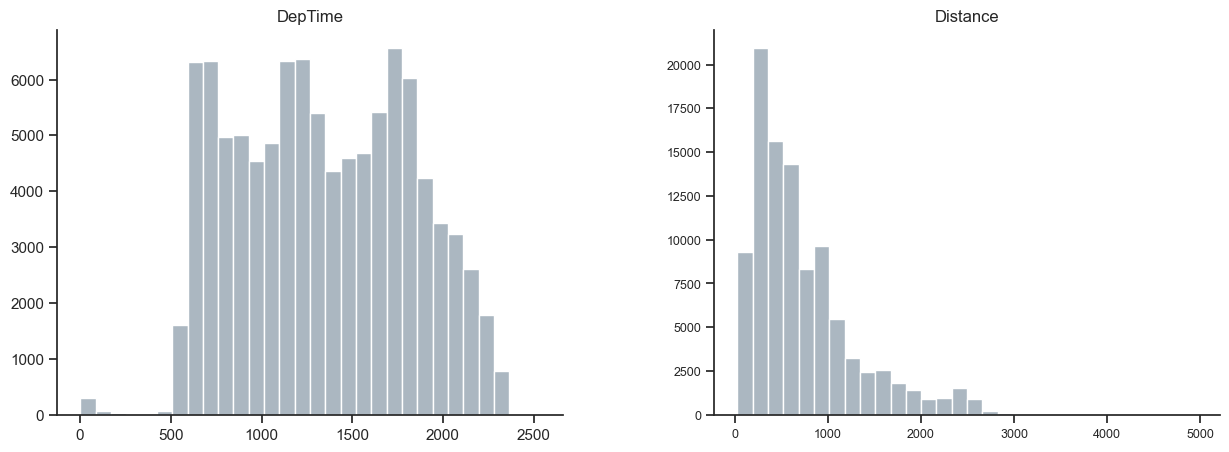

In [34]:
data_raw.hist(figsize=(15, 5), bins=30, grid=False, color=color)

plt.xticks(size=9)
plt.yticks(size=9)
plt.show()

In [35]:
data_raw.columns

Index(['Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'UniqueCarrier',
       'Origin', 'Dest', 'Distance', 'dep_delayed_15min'],
      dtype='object')

In [36]:
quant_feat_list = data_raw.select_dtypes(include=['int64', 'float64']).columns.to_list()
cat_feat_list = data_raw.select_dtypes(include=['object', 'bool']).columns.to_list()
tar_list = ['dep_delayed_15min']

quant_feat_list = [i for i in quant_feat_list if i not in tar_list]
cat_feat_list = [i for i in cat_feat_list if i not in tar_list]

In [37]:
len(data_raw.columns)

9

In [38]:
len(quant_feat_list)+len(cat_feat_list)+len(tar_list)

9

### Balance

In [39]:
def balance(df, tar_list):
    f, ax = plt.subplots(figsize=(3, 3))
    sns.countplot(data=df,
                  x=tar_list[0],
                  palette=palette)
    plt.xticks(size=9)
    plt.yticks(size=9)
    plt.show()

    print('Total: {}'.format(
        df.loc[df[tar_list[0]] == 1, tar_list[0]].count() +
        df.loc[df[tar_list[0]] == 0, tar_list[0]].count()), '\n')

    print(f'Negative: {df.loc[df[tar_list[0]] == 0, tar_list[0]].count()}')
    print(f'Positive: {df.loc[df[tar_list[0]] == 1, tar_list[0]].count()}', '\n')

    print('Positive / Negative: {}'.format(
        round(df.loc[df[tar_list[0]] == 1, tar_list[0]].count() /
              df.loc[df[tar_list[0]] == 0, tar_list[0]].count(), 2)))

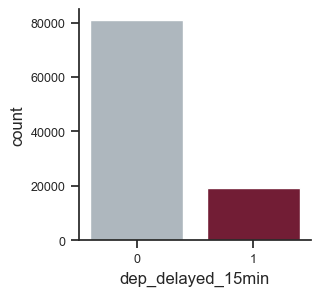

Total: 100000 

Negative: 80956
Positive: 19044 

Positive / Negative: 0.24


In [40]:
balance(data_raw, tar_list)

### Train-Test Split

In [41]:
x = data_raw.drop('dep_delayed_15min', axis=1)
y = data_raw['dep_delayed_15min'].astype('int')

In [42]:
x_train, x_valid, y_train, y_valid = train_test_split(x,
                                                      y,
                                                      stratify=y,
                                                      test_size=0.25)

In [43]:
data_train = pd.concat([x_train, y_train], axis=1)

In [44]:
data_train

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
35943,c-8,c-28,c-7,750,US,PHL,PIT,267,0
30195,c-8,c-6,c-7,1020,MQ,BTR,DFW,383,0
85337,c-7,c-28,c-4,956,XE,IAD,EWR,213,0
64021,c-11,c-25,c-5,1556,AA,SNA,DFW,1205,0
58941,c-8,c-7,c-1,736,WN,DAL,ABQ,580,0
...,...,...,...,...,...,...,...,...,...
15236,c-5,c-11,c-4,1701,NW,TPA,MEM,656,0
8893,c-4,c-19,c-3,623,MQ,BDL,RDU,532,0
89388,c-1,c-22,c-7,1402,UA,LAS,SFO,414,1
10975,c-11,c-3,c-4,1535,DL,BDL,ATL,859,0


### Quantitative variables

#### Distance

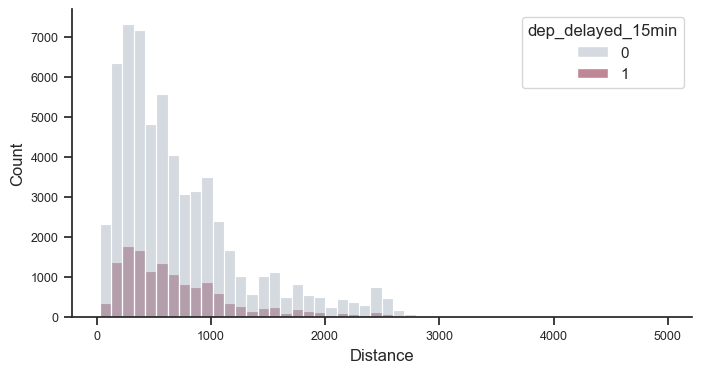

In [45]:
f, ax = plt.subplots(figsize=(8, 4))

sns.histplot(data=data_train,
             x='Distance',
             hue='dep_delayed_15min',
             bins=50,
             palette=palette)

plt.xticks(size=9)
plt.yticks(size=9)
plt.show()

In [46]:
data_train['Distance'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
Distance,75000.0,729.712173,573.061728,30.0,318.0,575.0,956.0,4962.0


#### DepTime

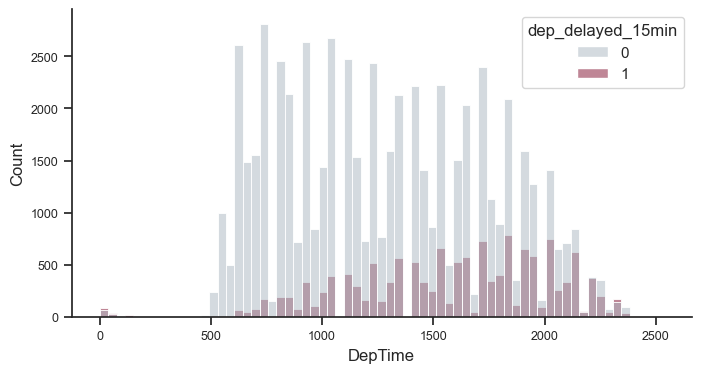

In [47]:
f, ax = plt.subplots(figsize=(8, 4))

sns.histplot(data=data_train,
             x='DepTime',
             hue='dep_delayed_15min',
             palette=palette)

plt.xticks(size=9)
plt.yticks(size=9)
plt.show()

In [48]:
data_train['DepTime'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
DepTime,75000.0,1342.216453,476.596336,1.0,931.0,1330.0,1734.0,2534.0


In [49]:
data_train[data_train['DepTime'] > 2359]['DepTime'].count()

18

### Categorial variables

#### Days and Months

In [50]:
data_train['Month'].nunique()

12

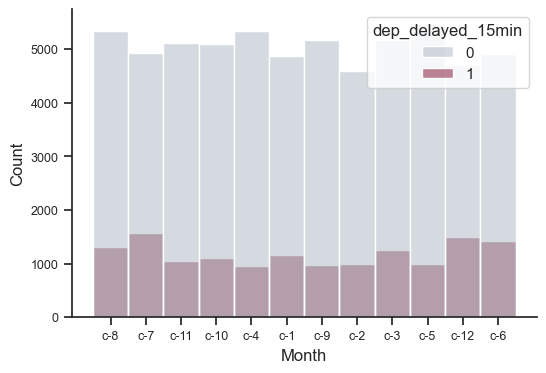

In [51]:
f, ax = plt.subplots(figsize=(6, 4))

sns.histplot(data=data_train,
             x='Month',
             bins=data_train['Month'].nunique(),
             hue='dep_delayed_15min',
             palette=palette)

plt.xticks(size=9)
plt.yticks(size=9)
plt.show()

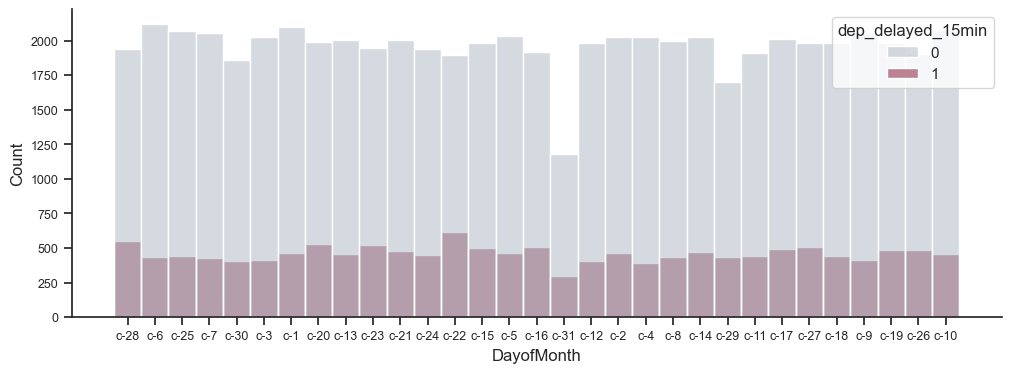

In [52]:
f, ax = plt.subplots(figsize=(12, 4))

sns.histplot(data=data_train,
             x='DayofMonth',
             bins=data_train['DayofMonth'].nunique(),
             hue='dep_delayed_15min',
             palette=palette)

plt.xticks(size=9)
plt.yticks(size=9)
plt.show()

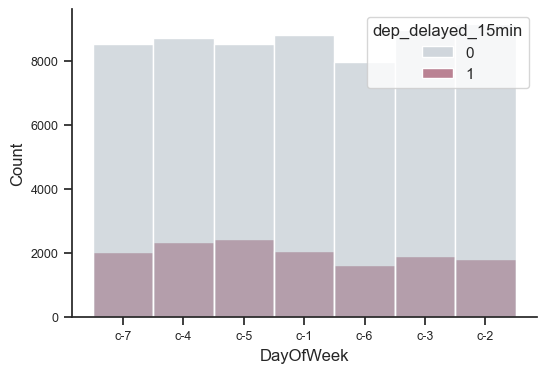

In [53]:
f, ax = plt.subplots(figsize=(6, 4))

sns.histplot(data=data_train,
             x='DayOfWeek',
             bins=data_train['DayOfWeek'].nunique(),
             hue='dep_delayed_15min',
             palette=palette)

plt.xticks(size=9)
plt.yticks(size=9)
plt.show()

#### UniqueCarrier

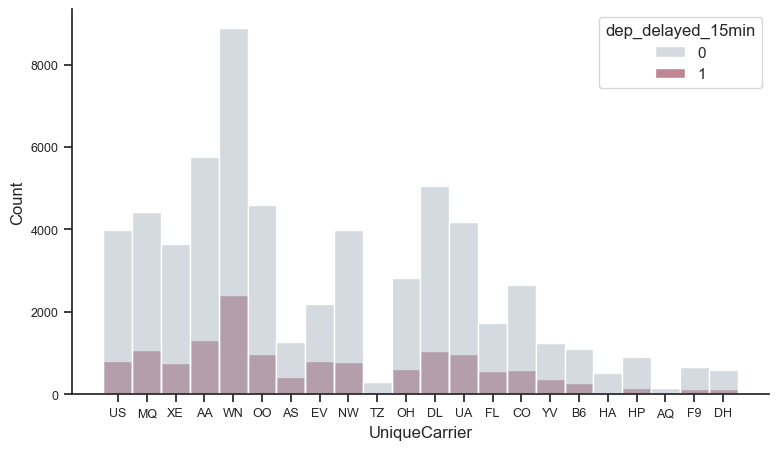

In [54]:
f, ax = plt.subplots(figsize=(9, 5))

sns.histplot(data=data_train,
             x='UniqueCarrier',
             bins=data_train['UniqueCarrier'].nunique(),
             hue='dep_delayed_15min',
             palette=palette)

plt.xticks(size=9)
plt.yticks(size=9)
plt.show()

#### Origin and Dest

In [55]:
data_train[['Origin', 'Dest']].describe(include=object).T

,count,unique,top,freq
Origin,75000,285,ATL,4422
Dest,75000,286,ATL,4395


### Train Dataset Transform

#### Drop Columns with Month and Days

In [56]:
x_train

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance
35943,c-8,c-28,c-7,750,US,PHL,PIT,267
30195,c-8,c-6,c-7,1020,MQ,BTR,DFW,383
85337,c-7,c-28,c-4,956,XE,IAD,EWR,213
64021,c-11,c-25,c-5,1556,AA,SNA,DFW,1205
58941,c-8,c-7,c-1,736,WN,DAL,ABQ,580
...,...,...,...,...,...,...,...,...
15236,c-5,c-11,c-4,1701,NW,TPA,MEM,656
8893,c-4,c-19,c-3,623,MQ,BDL,RDU,532
89388,c-1,c-22,c-7,1402,UA,LAS,SFO,414
10975,c-11,c-3,c-4,1535,DL,BDL,ATL,859


In [57]:
cat_feat_list

['Month', 'DayofMonth', 'DayOfWeek', 'UniqueCarrier', 'Origin', 'Dest']

In [58]:
quant_feat_list

['DepTime', 'Distance']

In [59]:
drop_feat_list = ['Month', 'DayofMonth', 'DayOfWeek']

In [60]:
drop_feat_list

['Month', 'DayofMonth', 'DayOfWeek']

In [61]:
class ColumnDropper():

    def transform(self, x, y=None):

        global cat_feat_list
        global quant_feat_list

        self.drop_columns = set(drop_feat_list) & set(x.columns)
        self.x1 = x.copy()

        for i in self.drop_columns:
            # self.x1 = self.x1.drop(drop_feat_list, axis=1)
            self.x1 = self.x1.drop(i, axis=1)

        cat_feat_list = [i for i in cat_feat_list if i not in drop_feat_list]
        quant_feat_list = [i for i in quant_feat_list if i not in drop_feat_list]

        return self.x1

In [62]:
dropper = ColumnDropper()

In [63]:
x_train = dropper.transform(x_train)

In [64]:
x_train

,DepTime,UniqueCarrier,Origin,Dest,Distance
35943,750,US,PHL,PIT,267
30195,1020,MQ,BTR,DFW,383
85337,956,XE,IAD,EWR,213
64021,1556,AA,SNA,DFW,1205
58941,736,WN,DAL,ABQ,580
...,...,...,...,...,...
15236,1701,NW,TPA,MEM,656
8893,623,MQ,BDL,RDU,532
89388,1402,UA,LAS,SFO,414
10975,1535,DL,BDL,ATL,859


In [65]:
cat_feat_list

['UniqueCarrier', 'Origin', 'Dest']

In [66]:
quant_feat_list

['DepTime', 'Distance']

### Balancing Data

In [67]:
x_train

,DepTime,UniqueCarrier,Origin,Dest,Distance
35943,750,US,PHL,PIT,267
30195,1020,MQ,BTR,DFW,383
85337,956,XE,IAD,EWR,213
64021,1556,AA,SNA,DFW,1205
58941,736,WN,DAL,ABQ,580
...,...,...,...,...,...
15236,1701,NW,TPA,MEM,656
8893,623,MQ,BDL,RDU,532
89388,1402,UA,LAS,SFO,414
10975,1535,DL,BDL,ATL,859


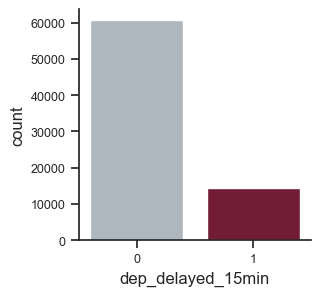

Total: 75000 

Negative: 60717
Positive: 14283 

Positive / Negative: 0.24


In [68]:
balance(pd.concat([x_train, y_train], axis=1),
        tar_list)

In [69]:
over_strategy = 1
under_strategy = 1

#### Oversampling

In [70]:
x_train.dtypes == object

DepTime          False
UniqueCarrier     True
Origin            True
Dest              True
Distance         False
dtype: bool

In [71]:
oversampling = SMOTENC(categorical_features=[x_train.dtypes == object],
                       sampling_strategy=over_strategy)

In [72]:
x_train, y_train = oversampling.fit_resample(x_train, y_train)

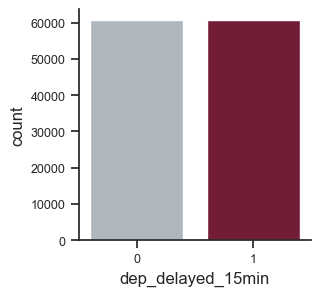

Total: 121434 

Negative: 60717
Positive: 60717 

Positive / Negative: 1.0


In [73]:
balance(pd.concat([x_train, y_train], axis=1),
        tar_list)

### Encoding Categorial Variables

In [74]:
cat_feat_list

['UniqueCarrier', 'Origin', 'Dest']

In [75]:
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=299)
encoder.fit(x_train[cat_feat_list])

OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=299)

In [76]:
x_train[cat_feat_list] = encoder.transform(x_train[cat_feat_list])

In [77]:
x_train

,DepTime,UniqueCarrier,Origin,Dest,Distance
0,750,18.0,211.0,214.0,267
1,1020,12.0,42.0,77.0,383
2,956,20.0,130.0,90.0,213
3,1556,0.0,256.0,77.0,1205
4,736,19.0,73.0,2.0,580
...,...,...,...,...,...
121429,1842,19.0,44.0,45.0,281
121430,1896,2.0,244.0,151.0,954
121431,2107,7.0,216.0,16.0,526
121432,2038,0.0,203.0,45.0,598


### Hyperparameters Tuning and Model Fitting

In [78]:
def hyperparameters(x_train, y_train, clf, scoring, search, hyper_params):

    global score
    global t_time

    if search == 'random':
        cv = RandomizedSearchCV(estimator=clf,
                                param_distributions=hyper_params,
                                scoring=scoring,
                                cv=5,
                                random_state=42)

        t_start = time.time()

        cv.fit(x_train, y_train)
        best_estimator = cv.best_estimator_
        score = round(cv.best_score_, 3)

        t_end = time.time()
        t_time = str(datetime.timedelta(seconds=np.round(t_end - t_start)))

        print('Time for hyperparameters searching: {}'.format(t_time), '\n')
        print(cv.best_estimator_, '\n')
        print('Best score: {}'.format(round(cv.best_score_, 3), '\n'))

        clf = None
        cv = None

        return best_estimator

    if search == 'grid':
        cv = GridSearchCV(estimator=clf,
                          param_grid=hyper_params,
                          scoring=scoring,
                          cv=5)

        t_start = time.time()

        cv.fit(x_train, y_train)
        best_estimator = cv.best_estimator_
        score = round(cv.best_score_, 3)

        t_end = time.time()
        t_time = str(datetime.timedelta(seconds=np.round(t_end - t_start)))

        print('Time for hyperparameters searching: {}'.format(t_time), '\n')
        print(cv.best_estimator_, '\n')
        print('Best score: {}'.format(round(cv.best_score_, 3), '\n'))

        clf = None
        cv = None

        return best_estimator

In [79]:
n_estimators = [10, 20, 30, 40, 50, 100]
max_depth = [50, 100, 150, 200, 250]
min_samples_split = [2, 4, 6, 8, 10]
min_samples_leaf = [2, 4, 6, 8, 10]
max_features = [None]

hyper_params_rf = {'n_estimators': n_estimators,
                   'max_depth': max_depth,
                   'min_samples_split': min_samples_split,
                   'min_samples_leaf': min_samples_leaf,
                   'max_features': max_features}

In [80]:
model = hyperparameters(x_train,
                        y_train,
                        clf=RandomForestClassifier(random_state=42),
                        scoring='roc_auc',
                        search='random',
                        hyper_params=hyper_params_rf)

Time for hyperparameters searching: 0:15:29 

RandomForestClassifier(max_depth=100, max_features=None, min_samples_leaf=2,
                       random_state=42) 

Best score: 0.907


In [81]:
model.fit(x_train, y_train)

RandomForestClassifier(max_depth=100, max_features=None, min_samples_leaf=2,
                       random_state=42)

### Transform Valid Dataset

In [82]:
x_valid

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance
72541,c-8,c-13,c-6,2001,AA,STL,DFW,551
16723,c-2,c-28,c-1,2045,OO,SLC,HLN,402
43748,c-6,c-23,c-5,711,WN,AUS,ELP,528
22071,c-11,c-8,c-3,1656,XE,DCA,CLE,310
82252,c-6,c-7,c-3,2120,NW,DTW,AZO,113
...,...,...,...,...,...,...,...,...
73351,c-11,c-13,c-1,652,AA,ORD,STL,258
47402,c-8,c-17,c-3,1009,DL,SLC,LAX,590
38452,c-1,c-19,c-3,828,AS,MCO,SEA,2553
65132,c-4,c-27,c-3,615,WN,PHX,ABQ,328


In [83]:
x_valid = dropper.transform(x_valid)

In [84]:
x_valid[cat_feat_list] = encoder.transform(x_valid[cat_feat_list])

In [85]:
x_valid

,DepTime,UniqueCarrier,Origin,Dest,Distance
72541,2001,0.0,260.0,77.0,551
16723,2045,15.0,253.0,121.0,402
43748,711,19.0,19.0,86.0,528
22071,1656,20.0,76.0,58.0,310
82252,2120,13.0,84.0,21.0,113
...,...,...,...,...,...
73351,652,0.0,203.0,259.0,258
47402,1009,6.0,253.0,151.0,590
38452,828,2.0,171.0,242.0,2553
65132,615,19.0,212.0,2.0,328


### Predict and Score on Valid Dataset

In [86]:
y_valid_pred_prob = model.predict_proba(x_valid)

In [87]:
y_valid_scores = np.round(y_valid_pred_prob, 1)[:, 1]

In [88]:
y_valid_scores

array([0.6, 0.2, 0.1, ..., 0.2, 0. , 0.6])

In [89]:
roc_auc = round(roc_auc_score(y_valid, y_valid_scores), 3)

In [90]:
roc_auc

0.77

### Transform Test Dataset

In [91]:
x_test_raw

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance
0,c-7,c-25,c-3,615,YV,MRY,PHX,598
1,c-4,c-17,c-2,739,WN,LAS,HOU,1235
2,c-12,c-2,c-7,651,MQ,GSP,ORD,577
3,c-3,c-25,c-7,1614,WN,BWI,MHT,377
4,c-6,c-6,c-3,1505,UA,ORD,STL,258
...,...,...,...,...,...,...,...,...
99995,c-6,c-5,c-2,852,WN,CRP,HOU,187
99996,c-11,c-24,c-6,1446,UA,ORD,LAS,1515
99997,c-1,c-30,c-2,1509,OO,ORD,SGF,438
99998,c-1,c-5,c-5,804,DL,LGA,ATL,761


In [92]:
x_test = x_test_raw.copy()

In [93]:
x_test = dropper.transform(x_test)

In [94]:
x_test[cat_feat_list] = encoder.transform(x_test[cat_feat_list])

In [95]:
x_test

,DepTime,UniqueCarrier,Origin,Dest,Distance
0,615,21.0,189.0,210.0,598
1,739,19.0,150.0,123.0,1235
2,651,12.0,115.0,201.0,577
3,1614,19.0,46.0,178.0,377
4,1505,17.0,203.0,259.0,258
...,...,...,...,...,...
99995,852,19.0,67.0,123.0,187
99996,1446,17.0,203.0,149.0,1515
99997,1509,15.0,203.0,244.0,438
99998,804,6.0,157.0,16.0,761


### Predict and Score on Test Dataset

In [96]:
y_test_pred_prob = model.predict_proba(x_test)

In [97]:
y_scores = np.round(y_test_pred_prob, 1)[:, 1]

In [98]:
y_scores

array([0.1, 0. , 0.2, ..., 0.5, 0.1, 0.2])

### Test Dataset With Scores

In [99]:
y_scores_df = pd.DataFrame(y_scores, columns=['dep_delayed_15min'])

In [100]:
y_scores_df

,dep_delayed_15min
0,0.1
1,0.0
2,0.2
3,0.4
4,0.4
...,...
99995,0.5
99996,0.2
99997,0.5
99998,0.1


In [101]:
x_test_final = pd.concat([x_test_raw, y_scores_df], axis=1)

In [102]:
x_test_final

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,c-7,c-25,c-3,615,YV,MRY,PHX,598,0.1
1,c-4,c-17,c-2,739,WN,LAS,HOU,1235,0.0
2,c-12,c-2,c-7,651,MQ,GSP,ORD,577,0.2
3,c-3,c-25,c-7,1614,WN,BWI,MHT,377,0.4
4,c-6,c-6,c-3,1505,UA,ORD,STL,258,0.4
...,...,...,...,...,...,...,...,...,...
99995,c-6,c-5,c-2,852,WN,CRP,HOU,187,0.5
99996,c-11,c-24,c-6,1446,UA,ORD,LAS,1515,0.2
99997,c-1,c-30,c-2,1509,OO,ORD,SGF,438,0.5
99998,c-1,c-5,c-5,804,DL,LGA,ATL,761,0.1


In [103]:
x_test_final.to_csv('flight_delays_test_with_scores.csv')

## 4. Междисциплинарная задача
Есть узел, в который подходит три трубы, как на рисунке.

![title](3Pipes.png)
Приборы на трубах показывают, что в узел поступает 90, по левой трубе уходит 35, а по правой - 60. Чего именно - не важно, это может быть электрический ток, расход воды и т.п. Важно, что в узле нет ни потерь, ни источников.

Вопрос состоит в том, сколько на самом деле течет по каждой из труб.

### Оценка
* Правильный подход - 50 баллов
* Правильный ответ - еще 25 баллов

### Решение

Пусть x1, x2, x3 - истинные значения потоков 90, 35 и 60 соответственно. <br>
Для расчёта вектора истинных значений используется формула 3-8 (стр. 63.): <br>

x_ = y - Sigma * A.transpose * (A * Sigma* A.transpose).inv * A * y

Здесь:
- x_ - вектор истинных значений потоков;
- y - вектор измеренных значений потоков;
- A - матрица, состоящая из n столбцов (число потоков) и m строк (узлы);
- Sigma - матрица ковариаций ошибок измерений;

A - это матрица, в которой элемент равен 1,-1 или 0 в зависимости от направленности потоков в данном узле (строке). <br>
В условии заданы один узел и три потока: 1 - входящий; 2,3 - исходящие. Матрица состоит из одной строки с тремя столбцами [1,-1,-1].

Sigma - это матрица, в которой элементы главной диагонали равны дисперсиям измерений соответствующих потоков. <br>
По условию задачи дисперсии неизвестны (так как проводится только одно измерение для каждого из трех потоков), поэтому обозначим дисперсии потоков w1, w2, w3 соответственно. 

In [104]:
import sympy as sp

In [105]:
w1, w2, w3 = sp.var('w1 w2 w3')

In [106]:
y = sp.Matrix([
    [90],
    [35],
    [60]
])

In [107]:
y

Matrix([
[90],
[35],
[60]])

In [108]:
A = sp.Matrix([
    [1, -1, -1]
])

In [109]:
A

Matrix([[1, -1, -1]])

In [110]:
Sigma = sp.Matrix([
    [w1, 0, 0],
    [0, w2, 0],
    [0, 0, w3]
])

In [111]:
Sigma

Matrix([
[w1,  0,  0],
[ 0, w2,  0],
[ 0,  0, w3]])

### Расчет вектора истинных значений x_

x_ = y - Sigma * A.transpose * (A * Sigma* A.transpose).inv * A * y

Пусть: </br>
x_1 = Sigma * A.transpose, </br>
x_2 = (A * Sigma* A.transpose).inv, </br>
x_3 = A * y, </br>

тогда x_ = y - x_1 * x_2 * x_3

In [112]:
x_1 = Sigma.multiply(A.transpose())

In [113]:
x_2 = (A.multiply(Sigma).multiply(A.transpose())).inv()

In [114]:
x_3 = A.multiply(y)

In [115]:
x_ = y - x_1.multiply(x_2.multiply(x_3))

In [116]:
x_

Matrix([
[ 5*w1/(w1 + w2 + w3) + 90],
[-5*w2/(w1 + w2 + w3) + 35],
[-5*w3/(w1 + w2 + w3) + 60]])

### Ответ

x1 = 90 + 5 * w1 / (w1 + w2 + w3) <br>
x2 = 35 - 5 * w2 / (w1 + w2 + w3) <br>
x3 = 60 - 5 * w3 / (w1 + w2 + w3)